局部搜索算法

In [87]:
from scipy.misc import imsave  
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import time

In [88]:
class Point(object):
    def __init__(self,pos,parent,deepth):
        self.parent=parent #标记父亲节点指针
        self.pos=pos  #当前点的位置
        self.deepth=deepth#当前节点深度

In [89]:
#起点到当前点的耗散值
def g(node):
    return node.deepth

#启发函数
def h(node,target):
    pos=node.pos
    #v1=np.array(node.pos)
    #v2=np.array(target)
    #return  np.linalg.norm(v1 - v2) #2范数，即欧氏距离
    if abs(pos[0]-target[0])>abs(pos[1]-target[1]):
        return abs(pos[0]-target[0])
    else:
        return abs(pos[1]-target[1])

In [90]:
#评估函数
def ff(node,target):
    return g(node)+h(node,target)

In [91]:
#评估函数相等时的排序方法
def possibility(node,target):
    v1=np.array(node.pos)
    v2=np.array(target)
    return  np.linalg.norm(v1 - v2) #2范数，即欧氏距离

In [92]:
def draw_map(barrier,path=None,expand_point=None):
    
    fig = plt.figure(figsize=(13,13)) 
    plt.scatter(x=[x[0] for x in barrier] ,y=[x[1] for x in barrier],c = 'r',marker = 's') 
    if expand_point!=None:
        plt.scatter(x=[x[0] for x in expand_point] ,y=[x[1] for x in expand_point],c = 'c',marker = 's') 
    if path!=None:
        plt.scatter(x=[x[0] for x in path] ,y=[x[1] for x in path],c = 'b',marker = 's') 
    plt.gca().invert_yaxis() 
    plt.show() 

In [93]:
def open_sort(open_list,target):
    open_list.sort(key=lambda x: (ff(x,target),possibility(x,target)))
    #print([item.pos for item in open_list])
    #print([ff(item,target) for item in open_list])
    return open_list

In [94]:
def expand_first(open_list,closed_list,barrier,target):
    point=open_list[0]#取open表第一个元素
    pos=point.pos
    closed_list.append(point)#将当前节点加入closed表
    open_pos=[item.pos for item in open_list]
    #print(open_pos)
    closed_pos=[item.pos for item in closed_list]
    if point.pos==target:
        return True,open_list,closed_list,point
    else:
        #扩展周围的点
        neighbors = [[pos[0]-1,pos[1]-1],[pos[0]-1,pos[1]],[pos[0]-1,pos[1]+1],[pos[0],pos[1]-1],[pos[0],pos[1]+1],[pos[0]+1,pos[1]-1],[pos[0]+1,pos[1]],[pos[0]+1,pos[1]+1]]
        neighbor_point_list=[]
        for neighbor in neighbors:
            if neighbor[0]>=0 and neighbor[1]>=0 and neighbor[0]<=99 and neighbor[1]<=99  and neighbor not in barrier and neighbor not in closed_pos:
                temp_point=Point(neighbor,point,point.deepth+1)
                neighbor_point_list.append(temp_point)
        if len(neighbor_point_list)!=0:
            open_sort(neighbor_point_list,target)
            neighbor=neighbor_point_list[0].pos
            if neighbor not in open_pos and neighbor not in closed_pos:#新节点
                neighbor_point=Point(neighbor,point,point.deepth+1)
                open_list.append(neighbor_point)
                open_pos.append(neighbor)
            elif neighbor in open_pos:#待扩展节点
                for item in open_list:
                    if item.pos==neighbor:
                        if g(point)+h(item,target)+1<ff(item,target):
                            item.parent=point  #标记父节点指针
                            item.deepth=point.deepth+1
                            break
            else :#在closed表中的已扩展的点
                for item in closed_list:
                    if item.pos==neighbor:
                        if g(point)+h(item,target)<ff(item,target):
                            item.parent=point  #标记父节点指针
                            item.deepth=point.deepth+1
                            open_list.append(item)
                            open_pos.append(item.pos)
                            closed_pos.remove(item.pos)
                            closed_list.remove(item)
                            break
                                
        return False,open_list[1:],closed_list,point

In [95]:
map_list=[]

f = open("data/0.25.txt", "r")
#将地图数据读进map中
for i in range(100):
    line=f.readline()
    row=list(line)#转化为数组
    row.pop()#去除尾部换行符
    map_list.append(row)
#print(map_list)
f.close()

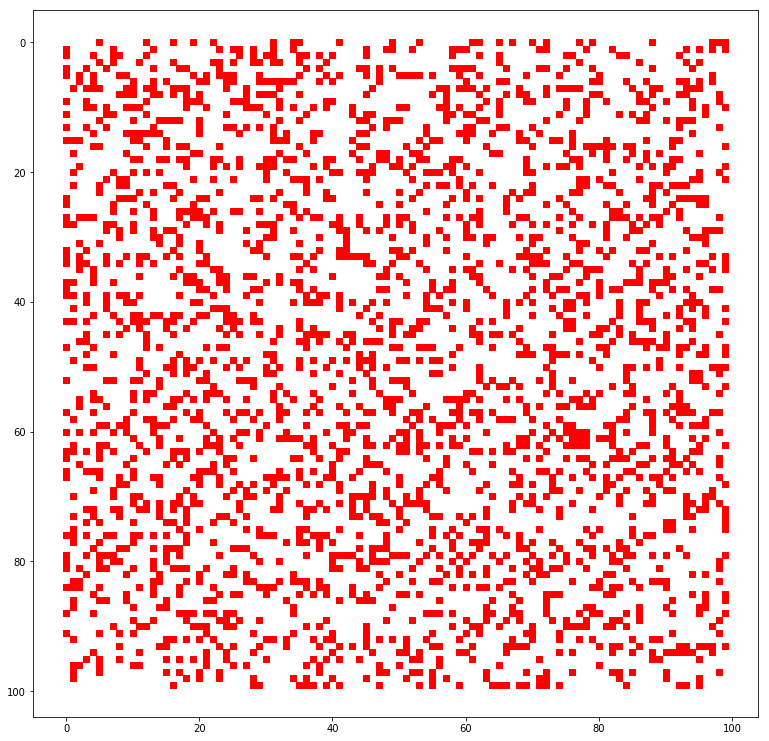

In [96]:
barrier=[]
empty=[]
for index_x in range(100):
    for index_y in range(100):
        if map_list[index_x][index_y]=='1':
            barrier.append([index_y,index_x])
        if map_list[index_x][index_y]=='0':
            empty.append([index_y,index_x])
draw_map(barrier)

In [97]:
def search_path(start,target,barrier,draw=True,print_path=True):
    path=[]
    expand_point=[]
    open_list=[]
    closed_list=[]
    if start in barrier or target in barrier:
        print('No Path')
    else:
        point = Point(start,None,0)
        open_list.append(point)

        while len(open_list):

            istarget,open_list,closed_list,target_point=expand_first(open_list,closed_list,barrier,target)
            #open_list=open_sort(open_list,target)
            #print([item.pos for item in open_list])
            if istarget==True:
                while target_point.parent!=None:
                    path.append(target_point.pos)
                    target_point=target_point.parent
                path.append(start)
                path.reverse()
                if print_path:
                    print(path)
                break;
        if len(open_list)==0:
            print('No Path')
        if draw:
            visited=[item.pos for item in closed_list]
            draw_map(barrier,path,visited)

[[4, 0], [5, 1], [6, 2], [6, 3], [7, 4], [7, 5], [8, 6], [8, 7], [7, 8], [8, 9], [9, 9], [10, 9], [11, 9], [12, 10], [13, 11], [13, 12], [14, 13], [15, 14], [16, 15], [16, 16], [17, 17], [18, 17], [19, 18], [20, 19], [21, 20], [21, 21], [22, 22], [22, 23], [23, 24], [24, 25], [25, 25], [26, 25], [27, 26], [28, 27], [28, 28], [29, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 37], [38, 38], [39, 38], [40, 39], [40, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 45], [46, 45], [47, 45], [48, 46], [48, 47], [49, 48], [49, 49], [50, 50], [51, 51], [52, 52], [53, 53], [54, 54], [55, 55], [56, 56], [57, 57], [58, 58], [59, 59], [60, 60], [61, 61], [62, 62], [63, 63], [64, 64], [65, 65], [66, 66], [67, 67], [66, 68], [67, 69], [68, 69], [69, 70], [70, 69], [71, 70], [72, 71], [73, 72], [73, 73], [74, 74], [75, 75], [76, 76], [76, 77], [77, 78], [78, 79], [79, 80], [80, 81], [81, 81], [82, 81], [83, 82], [84, 83], [85, 84], [86, 85], [87

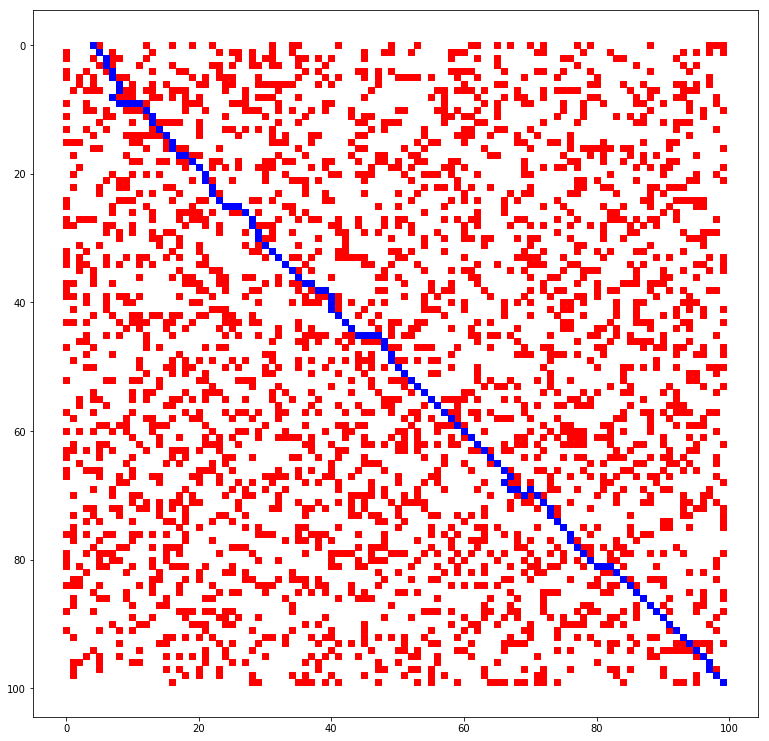

In [98]:
#测试用例
start=[4, 0]
target=[99, 99]
search_path(start,target,barrier,True)

In [99]:
#批量生成随机值测试，时间评估
#为了精确测量，我们测量多次求其平均值
time_list=[]
for i in range(50):
    index_start=random.randint(0,len(empty))#只从空白的点选取开始和结束点
    index_target=random.randint(0,len(empty))

    start=empty[index_start]
    target=empty[index_target]
    print(start,end='')
    print(target)
    time_start=time.clock()
    search_path(start,target,barrier,False,False)  #画图等I/O操作相当耗费时间，不应计算在时间内,设为false
    time_end=time.clock()
    time_list.append(time_end-time_start)
time_avg=sum(time_list)/len(time_list)
time_avg

[33, 7][25, 38]
[25, 65][28, 93]
[10, 31][33, 46]
[25, 80][39, 87]
[31, 52][97, 60]
[82, 75][66, 44]
[79, 37][55, 71]
[30, 45][57, 37]
[38, 50][42, 42]
[92, 29][27, 41]
[85, 20][7, 22]
[64, 76][24, 56]
[24, 81][69, 36]
[79, 97][17, 52]
No Path
[91, 21][28, 13]
[76, 33][38, 28]
[26, 99][54, 0]
[14, 7][30, 65]
[29, 58][8, 46]
[53, 16][65, 15]
[90, 43][58, 45]
[86, 25][0, 68]
[1, 60][59, 84]
[79, 20][97, 83]
[95, 15][33, 39]
[74, 47][69, 69]
[62, 22][65, 41]
[16, 44][49, 18]
[28, 93][11, 13]
[83, 96][6, 24]
[84, 21][84, 48]
[59, 0][99, 54]
[3, 6][73, 64]
[77, 82][94, 89]
[85, 55][95, 82]
[42, 16][46, 23]
[85, 24][85, 18]
[71, 54][67, 86]
[40, 90][14, 78]
[29, 71][9, 72]
[59, 34][16, 5]
[23, 21][31, 93]
[28, 14][64, 89]
[82, 21][32, 35]
[47, 2][64, 10]
[97, 2][8, 88]
[90, 85][66, 80]
[66, 74][55, 84]
[88, 78][16, 40]
[90, 76][93, 23]


0.037598900785635575